## Polynomial Regression
By- Satyabrata Pradhan(23EE65R20)    
    
    


In [1]:
# Importing essential libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

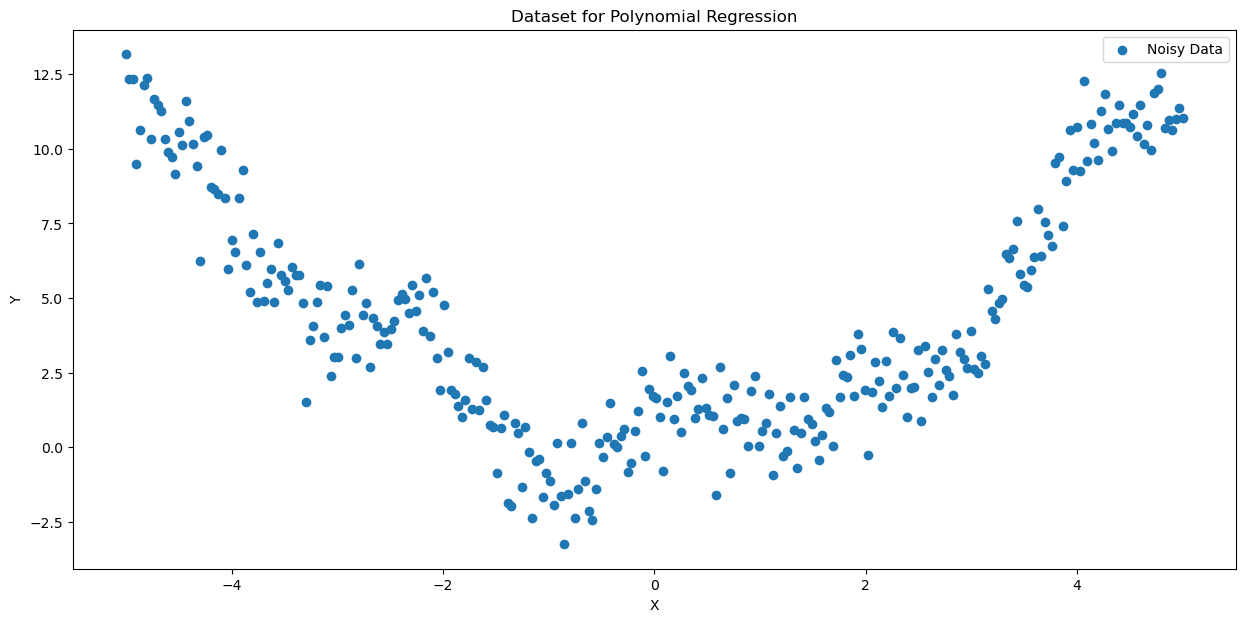

In [2]:
# Set random seed for reproducibility
np.random.seed(20)

# Generate x values
x = np.linspace(-5, 5, 300).reshape((-1, 1))


# Generate y values using a combination of sine, cosine, and polynomial functions with added noise
noise = np.random.normal(0, 1, x.shape)
y_true = np.sin(2 * x) + 0.5 * x ** 2 + np.cos(3 * x)
y_noisy = y_true + noise

y = y_noisy.reshape((-1, 1))

# Plot the true function and the different models
plt.figure(figsize=(15, 7))
plt.scatter(x, y_noisy, label='Noisy Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dataset for Polynomial Regression')
plt.show()

In [3]:
np.shape(x), np.shape(y)

((300, 1), (300, 1))

In [4]:
# Create the matrix X for polynomial degree n
degrees = 2
X = np.ones_like(x)
for i in range(degrees):
    X = np.hstack((X, x **(i+1)))

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * x.shape[0])

X_train, X_test = X[:split_index, :], X[split_index:, :]
y_train, y_test = y[:split_index, :], y[split_index:, :]


In [5]:
np.shape(X_train), np.shape(X_test)

((240, 3), (60, 3))

### Function to implement gradient descent

In [6]:
def train_model(X, y, theta, lr, epochs):
    m = len(y)     #number of samples
    history = []   #Initialize array to store training loss values

    for epoch in range(epochs):
        y_hat = np.dot(X, theta)  #predicted value
        
        #Compute error between true value and predicted value
        error = y_hat - y
        
        #Compute Gradient
        gradient = np.dot(X.T, error) / m
        
        #Update theta
        theta -= lr * gradient
        
        #Cost function
        cost = np.sum(error ** 2) / (2 * m)  #MSE loss function
        
        history.append(cost)
        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {float(cost):.4f}')

    return theta, history

In [7]:
# Initialize theta with zeros
theta_init = np.zeros((X_train.shape[1], 1))

# Set learning rate and number of epochs
learning_rate = 0.0001
num_epochs = 500

# Run gradient descent
theta_final, loss_history = train_model(X_train, y_train, theta_init, learning_rate, num_epochs)

Epoch 1/500, Train Loss: 10.9346
Epoch 2/500, Train Loss: 10.7561
Epoch 3/500, Train Loss: 10.5808
Epoch 4/500, Train Loss: 10.4086
Epoch 5/500, Train Loss: 10.2395
Epoch 6/500, Train Loss: 10.0734
Epoch 7/500, Train Loss: 9.9102
Epoch 8/500, Train Loss: 9.7500
Epoch 9/500, Train Loss: 9.5926
Epoch 10/500, Train Loss: 9.4380
Epoch 11/500, Train Loss: 9.2861
Epoch 12/500, Train Loss: 9.1370
Epoch 13/500, Train Loss: 8.9905
Epoch 14/500, Train Loss: 8.8466
Epoch 15/500, Train Loss: 8.7053
Epoch 16/500, Train Loss: 8.5665
Epoch 17/500, Train Loss: 8.4301
Epoch 18/500, Train Loss: 8.2962
Epoch 19/500, Train Loss: 8.1647
Epoch 20/500, Train Loss: 8.0355
Epoch 21/500, Train Loss: 7.9086
Epoch 22/500, Train Loss: 7.7840
Epoch 23/500, Train Loss: 7.6616
Epoch 24/500, Train Loss: 7.5413
Epoch 25/500, Train Loss: 7.4232
Epoch 26/500, Train Loss: 7.3072
Epoch 27/500, Train Loss: 7.1933
Epoch 28/500, Train Loss: 7.0814
Epoch 29/500, Train Loss: 6.9715
Epoch 30/500, Train Loss: 6.8635
Epoch 31/500,

In [8]:
theta_final

array([[ 0.03642843],
       [-0.09462507],
       [ 0.45734496]])

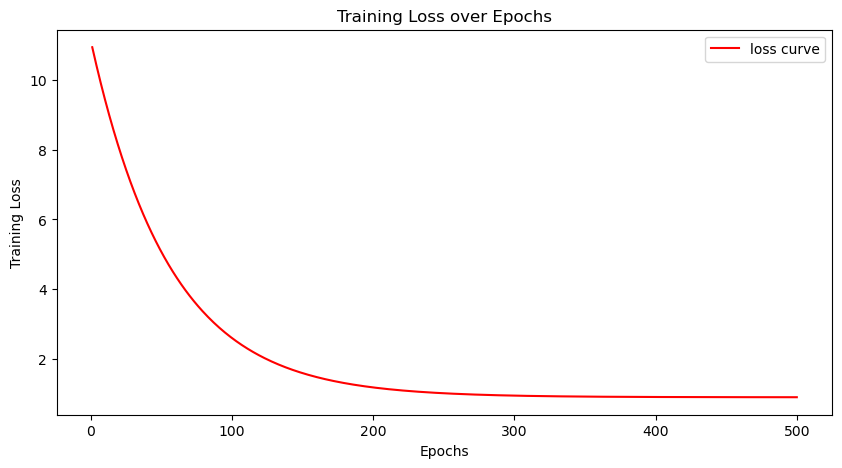

In [10]:
# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, linestyle='-', color='r', label='loss curve')                                     # marker='o'
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


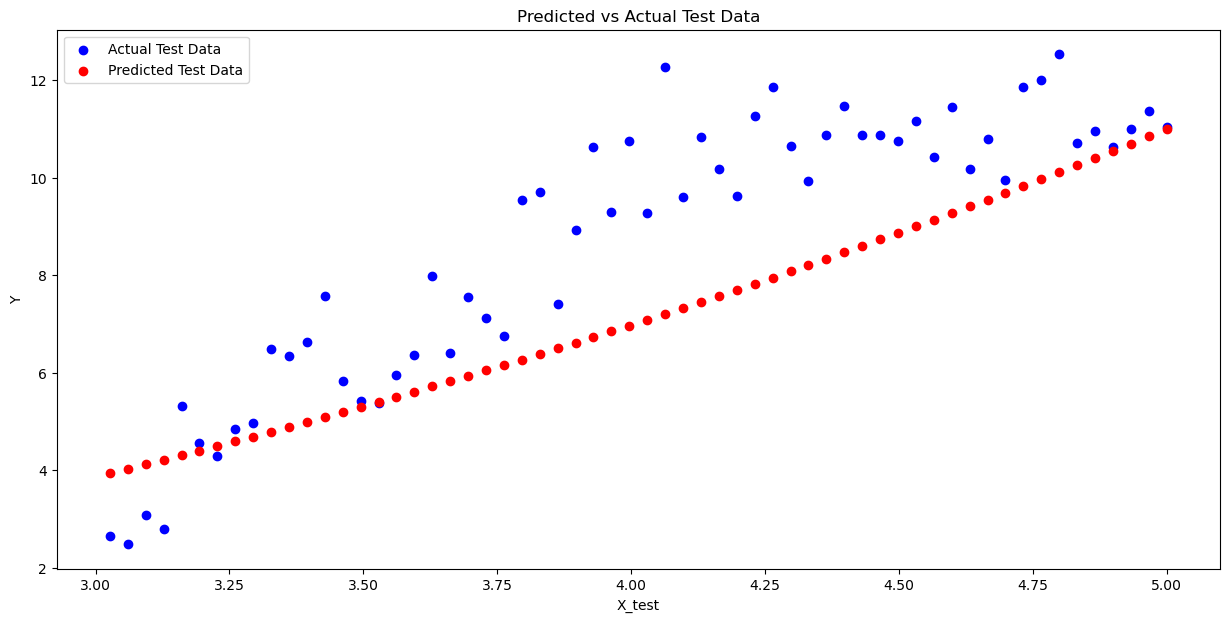

In [11]:
# Predict values for the test set
y_pred = np.dot(X_test, theta_final)

# Plot the predicted values against the actual values
plt.figure(figsize=(15, 7))
plt.scatter(x[split_index:], y_test, label='Actual Test Data', color='blue')
plt.scatter(x[split_index:], y_pred, label='Predicted Test Data', color='red')
plt.xlabel('X_test')
plt.ylabel('Y')
plt.legend()
plt.title('Predicted vs Actual Test Data')
plt.show()


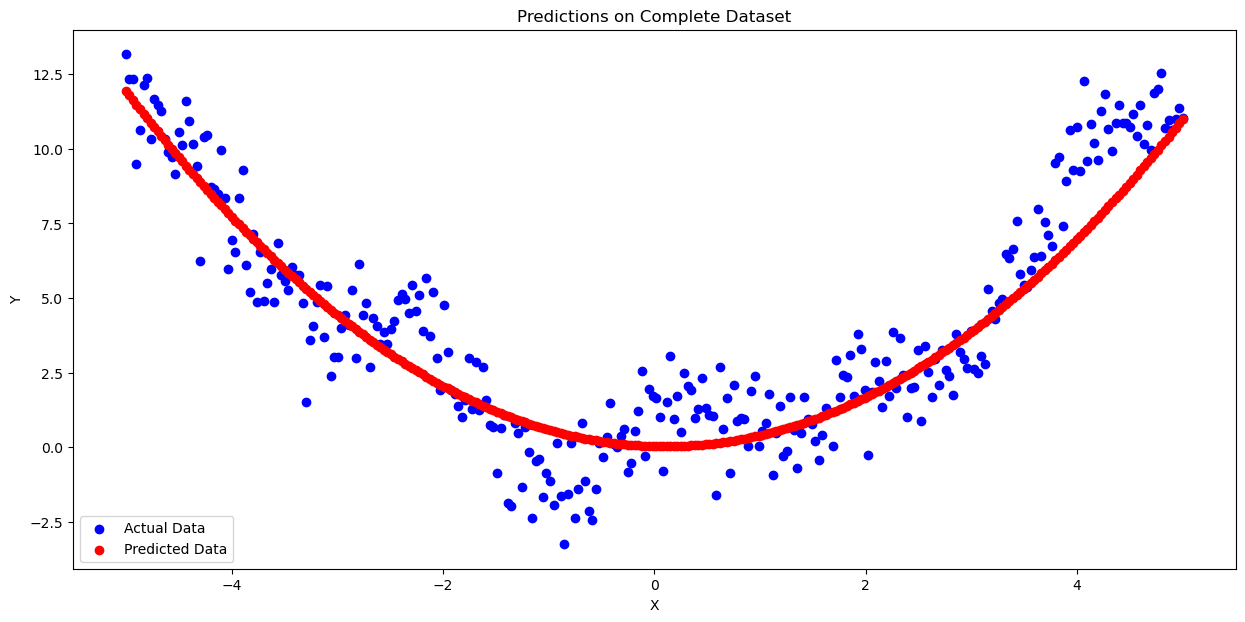

In [12]:
# Predict values for the complete data-set
y_pred = np.dot(X, theta_final)

# Plot the predicted values against the actual values
plt.figure(figsize=(15, 7))
plt.scatter(x, y, label='Actual Data', color='blue')
plt.scatter(x, y_pred, label='Predicted Data', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Predictions on Complete Dataset')
plt.show()